In [13]:
import numpy as np
import numpy_financial as npf

cena_poczatkowa = 120000 
procent_wzrostu_cen = 0.05  
stopa_procentowa = 0.12 / 12
okres_oszczedzania = 5 * 12  
miesieczna_wplata = None  

In [52]:
czas = np.arange(okres_oszczedzania + 1)
cena_mieszkania = cena_poczatkowa * (1 + procent_wzrostu_cen)**(czas / 12)
print(cena_mieszkania)

[120000.         120488.89485404 120979.78152623 121472.66813148
 121967.56281778 122464.47376629 122963.40919152 123464.37734142
 123967.38649758 124472.44497531 124979.56112379 125488.74332623
 126000.         126513.33959674 127028.77060254 127546.30153806
 128065.94095867 128587.69745461 129111.57965109 129637.59620849
 130165.75582246 130696.06722407 131228.53917998 131763.18049255
 132300.         132839.00657658 133380.20913267 133923.61661496
 134469.23800661 135017.08232734 135567.15863365 136119.47601892
 136674.04361358 137230.87058528 137789.96613898 138351.33951717
 138915.         139480.95690541 140049.2195893  140619.79744571
 141192.69990694 141767.9364437  142345.51656533 142925.44981986
 143507.74579426 144092.41411454 144679.46444593 145268.90649303
 145860.75       146455.00475068 147051.68056876 147650.787318
 148252.33490228 148856.33326589 149462.79239359 150071.72231086
 150683.13308398 151297.03482027 151913.43766822 152532.35181768
 153153.7875    ]


In [53]:
cena_po_5_latach = cena_poczatkowa * (1 + procent_wzrostu_cen)**5
miesieczna_wplata = npf.pmt(rate=stopa_procentowa, nper=okres_oszczedzania, pv=0, fv=-cena_po_5_latach)
miesieczna_wplata = abs(miesieczna_wplata)
print(miesieczna_wplata)

1875.283538788312


In [58]:
oszczednosci = np.zeros(okres_oszczedzania + 1)
oszczednosci[1:] = miesieczna_wplata
wartosc_lokaty = npf.fv(rate=stopa_procentowa, nper=czas, pmt=-miesieczna_wplata, pv=0)
print(wartosc_lokaty)

[    -0.           1875.28353879   3769.31991296   5682.29665088
   7614.40315618   9565.83072653  11536.77257258  13527.4238371
  15537.98161426  17568.64496919  19619.61495767  21691.09464603
  23783.28913128  25896.40556138  28030.65315578  30186.24322613
  32363.38919718  34562.30662794  36783.21323301  39026.32890413
  41291.87573196  43580.07802806  45891.16234713  48225.35750939
  50582.89462328  52964.0071083   55368.93071817  57797.90356414
  60251.16613857  62728.96133874  65231.53449092  67759.13337461
  70312.00824715  72890.41186841  75494.59952588  78124.82905993
  80781.36088932  83464.458037    86174.38615616  88911.41355651
  91675.81123086  94467.85288196  97287.81494956 100135.97663785
 103012.61994301 105918.02968123 108852.49351683 111816.30199079
 114809.74854949 117833.12957377 120886.7444083  123970.89539117
 127085.88788387 130232.03030149 133409.6341433  136619.01402352
 139860.48770254 143134.37611836 146441.00341833 149780.6969913
 153153.7875    ]


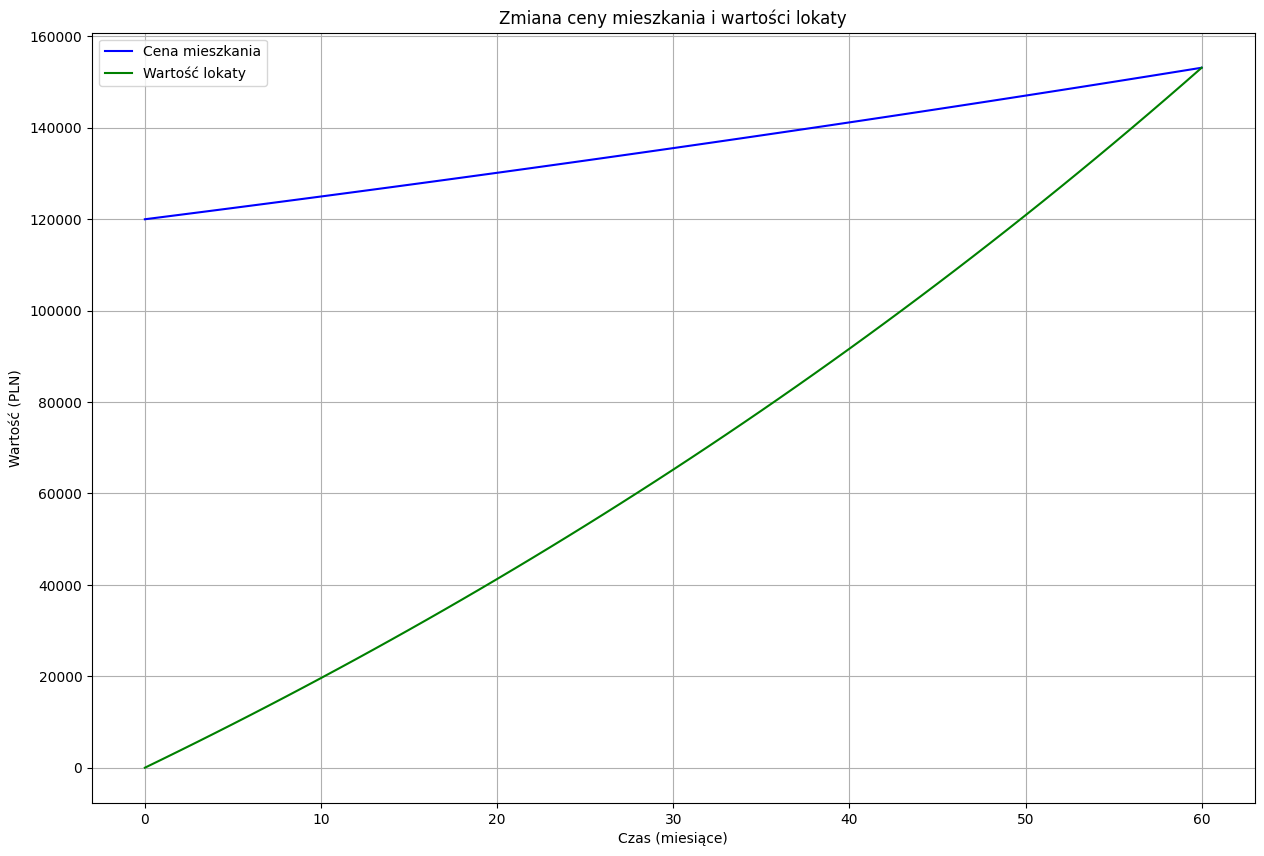

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.plot(czas, cena_mieszkania, label='Cena mieszkania', color='blue')
plt.plot(czas, wartosc_lokaty, label='Wartość lokaty', color='green')
plt.title('Zmiana ceny mieszkania i wartości lokaty')
plt.xlabel('Czas (miesiące)')
plt.ylabel('Wartość (PLN)')
plt.legend()
plt.grid(True)
plt.show()